# Biblioteca

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets as datasets

from redeneural import RedeNeural

# Datasets

In [54]:
x, y = datasets.make_moons(n_samples = 500, noise = 0.2, random_state = 42)

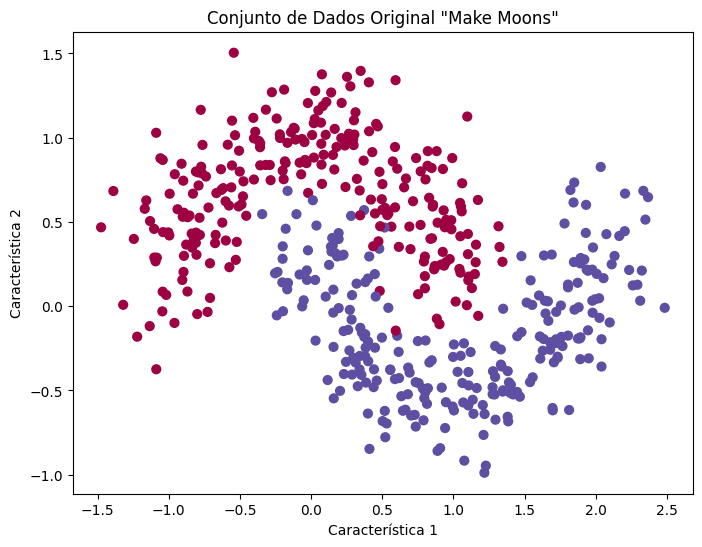

In [55]:
# Visualizando os dados
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap="Spectral")
plt.title('Conjunto de Dados Original "Make Moons"')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

# Teste

In [56]:
modelo = RedeNeural(x, y, 20, 2)
modelo.treinar(epocas=50000, taxa_aprendizado=0.01)

Época: [1/50000] | Perda: 0.6161 | Acurácia: 0.7320
Época: [5000/50000] | Perda: 0.2588 | Acurácia: 0.8700
Época: [10000/50000] | Perda: 0.1640 | Acurácia: 0.9380
Época: [15000/50000] | Perda: 0.1105 | Acurácia: 0.9660
Época: [20000/50000] | Perda: 0.0895 | Acurácia: 0.9760
Época: [25000/50000] | Perda: 0.0791 | Acurácia: 0.9800
Época: [30000/50000] | Perda: 0.0726 | Acurácia: 0.9820
Época: [35000/50000] | Perda: 0.0679 | Acurácia: 0.9840
Época: [40000/50000] | Perda: 0.0641 | Acurácia: 0.9840
Época: [45000/50000] | Perda: 0.0609 | Acurácia: 0.9840
Época: [50000/50000] | Perda: 0.0581 | Acurácia: 0.9840


array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,

In [57]:
# Salvando o modelo treinado
caminho_do_modelo = 'modelo teste.npz'
modelo.salvar_modelo(caminho_do_modelo)

Salvando o modelo em 'modelo teste.npz'...
Modelo salvo com sucesso!


# Plotagem

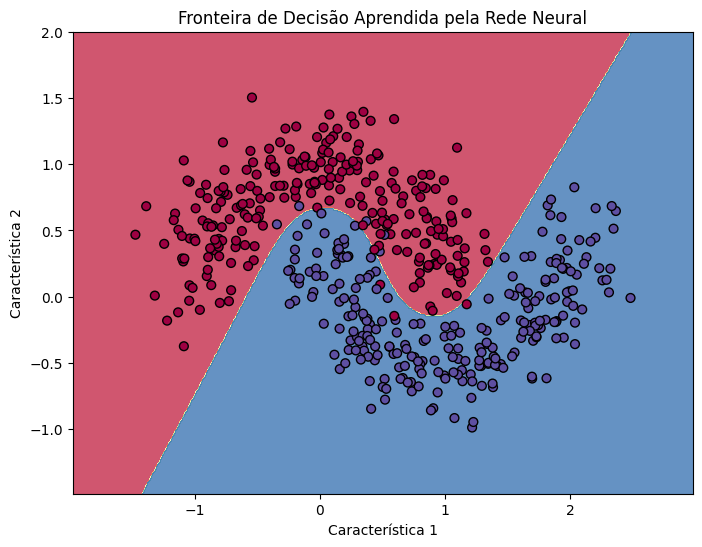

In [58]:
# Define os limites do gráfico
x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
h = 0.01

predita_funcao = lambda z: modelo.prever(z)
    
# Gera uma grade de pontos
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
# Faz a predição para cada ponto na grade
Z = predita_funcao(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
    
# Plota o contorno (fronteira de decisão) e os pontos de dados
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap="Spectral", alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap="Spectral", edgecolors='k')
plt.title("Fronteira de Decisão Aprendida pela Rede Neural")
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

# Usando o modelo guardado

In [59]:
novo_modelo = RedeNeural(x, y, neuronios_ocultos=20, neuronios_saida=2)

# CARREGANDO OS PESOS E BIASES SALVOS
novo_modelo.carregar_modelo(caminho_do_modelo)

Carregando modelo de 'modelo teste.npz'...
Modelo carregado com sucesso!


In [60]:
# Verificando o Modelo Carregado
# Fazendo previsões com o modelo que apenas carregou os pesos
previsoes = novo_modelo.prever(x)
acertos = (previsoes == y).sum()
acuracia = acertos / y.shape[0]

print(f"Acurácia: {acuracia:.4f}")

Acurácia: 0.9840
